## IMPORTING DIFFERENT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder as le, StandardScaler as ss
from sklearn.model_selection import cross_val_score, train_test_split as tts
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier as rclf
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklvq import GLVQ

In [2]:
#SEPARATING DATASET FOR FEATURES AND LABELS
def createData(dataset):
    x = dataset.iloc[:,:-1]
    y = dataset.iloc[:,-1]
    
    return x,y

## IMPORTING DATA AND DATA PREPROCESSING 

In [3]:
df = pd.read_csv('./traffic.csv')
df = df.drop(['Reference Number','Grid Ref: Easting', 'Grid Ref: Northing', 'Accident Date', 'Local Authority'], axis = 1)
df

,Number of Vehicles,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Vehicle Number,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,2,1812,3,A6120,1,1,1,2,11,2,3,2,6
1,2,1812,3,A6120,1,1,1,2,11,2,3,1,9
2,2,1812,3,A6120,1,1,1,2,11,2,3,2,39
3,2,1812,3,A6120,1,1,1,2,11,2,3,1,5
4,2,1812,3,A6120,1,1,1,2,11,2,3,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1,422,1,M1,2,4,4,1,9,1,3,1,27
1903,1,1000,3,A65,4,1,1,1,5,1,2,1,36
1904,2,1340,3,A58,1,1,1,2,1,1,2,1,59
1905,3,1640,3,A647,1,4,1,2,9,1,3,1,41


In [4]:
clasCau = df['Casualty Severity']
df.drop(['Casualty Severity'],axis = 1, inplace = True)
df

,Number of Vehicles,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Vehicle Number,Type of Vehicle,Casualty Class,Sex of Casualty,Age of Casualty
0,2,1812,3,A6120,1,1,1,2,11,2,2,6
1,2,1812,3,A6120,1,1,1,2,11,2,1,9
2,2,1812,3,A6120,1,1,1,2,11,2,2,39
3,2,1812,3,A6120,1,1,1,2,11,2,1,5
4,2,1812,3,A6120,1,1,1,2,11,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1,422,1,M1,2,4,4,1,9,1,1,27
1903,1,1000,3,A65,4,1,1,1,5,1,1,36
1904,2,1340,3,A58,1,1,1,2,1,1,1,59
1905,3,1640,3,A647,1,4,1,2,9,1,1,41


In [5]:
df['Casualty Severity'] = clasCau
df

,Number of Vehicles,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Vehicle Number,Type of Vehicle,Casualty Class,Sex of Casualty,Age of Casualty,Casualty Severity
0,2,1812,3,A6120,1,1,1,2,11,2,2,6,3
1,2,1812,3,A6120,1,1,1,2,11,2,1,9,3
2,2,1812,3,A6120,1,1,1,2,11,2,2,39,3
3,2,1812,3,A6120,1,1,1,2,11,2,1,5,3
4,2,1812,3,A6120,1,1,1,2,11,2,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1,422,1,M1,2,4,4,1,9,1,1,27,3
1903,1,1000,3,A65,4,1,1,1,5,1,1,36,2
1904,2,1340,3,A58,1,1,1,2,1,1,1,59,2
1905,3,1640,3,A647,1,4,1,2,9,1,1,41,3


In [6]:
x, y = createData(df)

In [7]:
le1 = le()

In [8]:
x['1st Road Class & No'] = le1.fit_transform(x['1st Road Class & No'])
x

,Number of Vehicles,Time (24hr),1st Road Class,1st Road Class & No,Road Surface,Lighting Conditions,Weather Conditions,Vehicle Number,Type of Vehicle,Casualty Class,Sex of Casualty,Age of Casualty
0,2,1812,3,11,1,1,1,2,11,2,2,6
1,2,1812,3,11,1,1,1,2,11,2,1,9
2,2,1812,3,11,1,1,1,2,11,2,2,39
3,2,1812,3,11,1,1,1,2,11,2,1,5
4,2,1812,3,11,1,1,1,2,11,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1,422,1,49,2,4,4,1,9,1,1,27
1903,1,1000,3,23,4,1,1,1,5,1,1,36
1904,2,1340,3,4,1,1,1,2,1,1,1,59
1905,3,1640,3,21,1,4,1,2,9,1,1,41


### PAIR PLOT TO CHECK DEPENDENCIES 

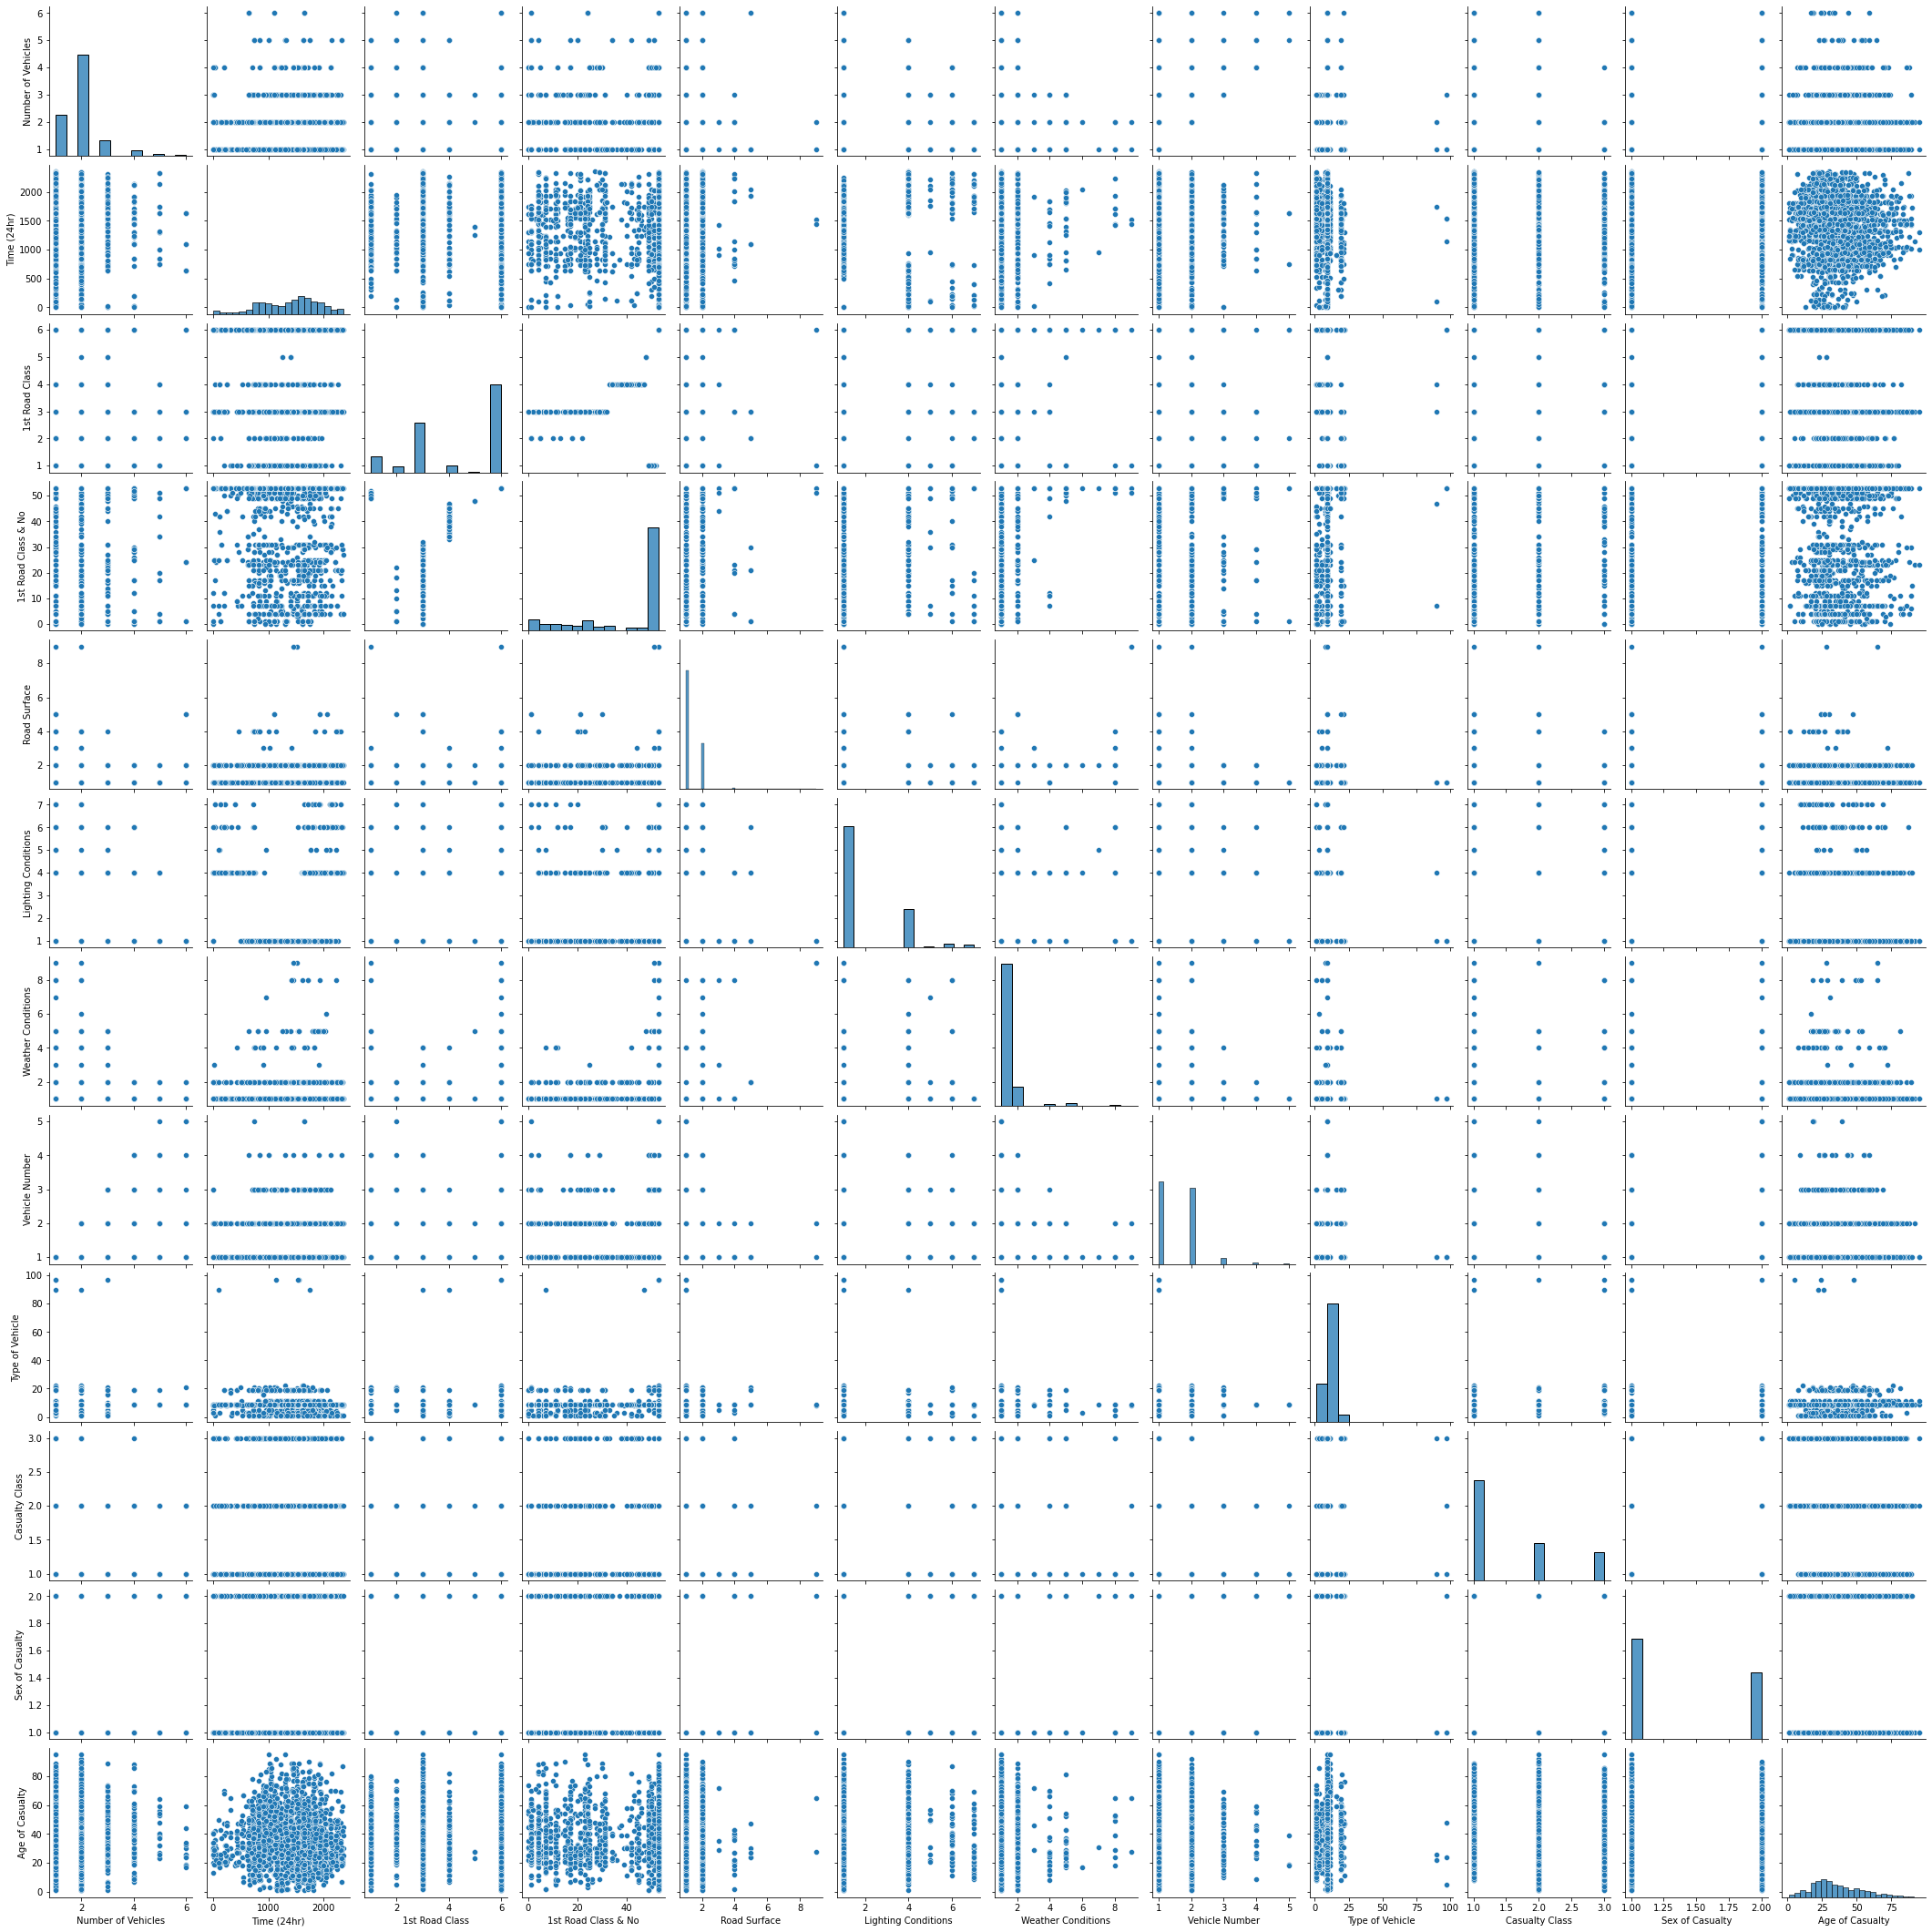

In [9]:
sns.pairplot(x)

### STANDARD SCALING THE VALUES FOR BEST FIT 

In [10]:
#Standard Scaling
ss1 = ss()

In [11]:
x = ss1.fit_transform(x)
print(x, y)

[[ 0.03777563  0.82514351 -0.77661266 ...  0.56398105  1.23119094
  -1.62515714]
 [ 0.03777563  0.82514351 -0.77661266 ...  0.56398105 -0.8122217
  -1.46154035]
 [ 0.03777563  0.82514351 -0.77661266 ...  0.56398105  1.23119094
   0.17462753]
 ...
 [ 0.03777563 -0.08801754 -0.77661266 ... -0.7396697  -0.8122217
   1.26540612]
 [ 1.25876092  0.49238143 -0.77661266 ... -0.7396697  -0.8122217
   0.28370539]
 [ 1.25876092  0.49238143 -0.77661266 ...  0.56398105 -0.8122217
  -0.53437855]] 0       3
1       3
2       3
3       3
4       3
       ..
1902    3
1903    2
1904    2
1905    3
1906    3
Name: Casualty Severity, Length: 1907, dtype: int64


### SPLITTING DATASET TO TRAIN AND TEST SET 

In [12]:
train_data, test_data, train_labels, test_labels = tts(x, y, test_size = .1, random_state = 0)
print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)

(1716, 12) (1716,) (191, 12) (191,)


## RANDOM FOREST CLASSIFIER 

In [13]:
rc = rclf()

In [14]:
rc.fit(train_data, train_labels)

RandomForestClassifier()

In [15]:
pred = rc.predict(test_data)

In [16]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.23      0.10      0.14        30
           3       0.84      0.94      0.89       160

    accuracy                           0.80       191
   macro avg       0.36      0.35      0.34       191
weighted avg       0.74      0.80      0.77       191



/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

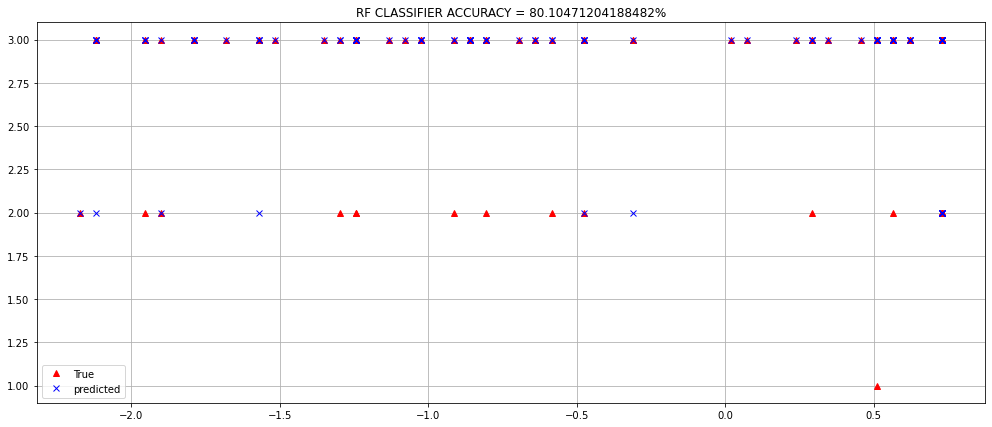

In [17]:
plt.figure(figsize=(17,7))
plt.grid()
plt.plot(test_data[:,3], test_labels, 'r^', label = 'True')
plt.plot(test_data[:,3], pred, 'bx', label = 'predicted')
plt.legend()
plt.title(f'RF CLASSIFIER ACCURACY = {rc.score(test_data, test_labels)*100}%')
plt.show()

## NAIVE BAYES CLASSIFIER 

In [42]:
nb = GaussianNB()

In [43]:
nb.fit(train_data,train_labels)

GaussianNB()

In [44]:
pred = nb.predict(test_data)

In [45]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.03      0.06        30
           3       0.83      0.93      0.88       160

    accuracy                           0.78       191
   macro avg       0.34      0.32      0.31       191
weighted avg       0.73      0.78      0.74       191



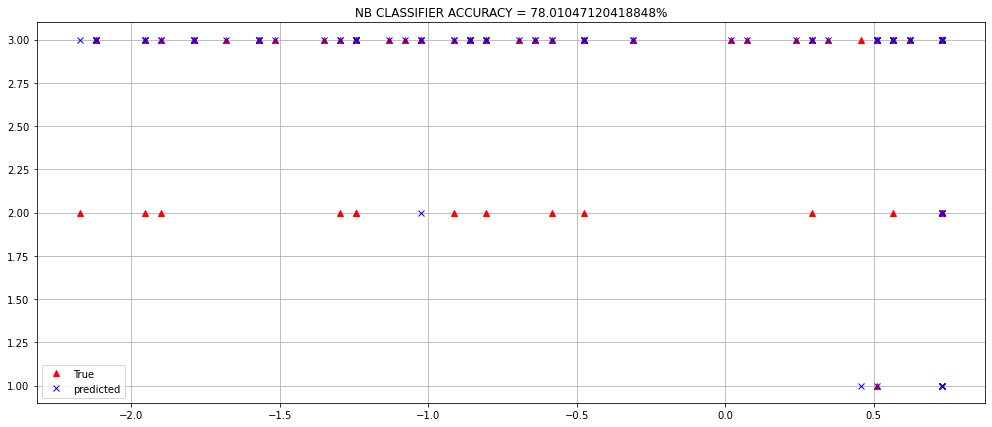

In [46]:
plt.figure(figsize=(17,7))
plt.grid()
plt.plot(test_data[:,3], test_labels, 'r^', label = 'True')
plt.plot(test_data[:,3], pred, 'bx', label = 'predicted')
plt.legend()
plt.title(f'NB CLASSIFIER ACCURACY = {nb.score(test_data, test_labels)*100}%')
plt.show()

## MULTI LAYER PERCEPTRON MODEL 

In [38]:
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

In [39]:
clf.fit(train_data, train_labels)

/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5)

In [40]:
pred = clf.predict(test_data)

In [41]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.43      0.10      0.16        30
           3       0.85      0.97      0.91       160

    accuracy                           0.83       191
   macro avg       0.43      0.36      0.36       191
weighted avg       0.78      0.83      0.79       191



/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

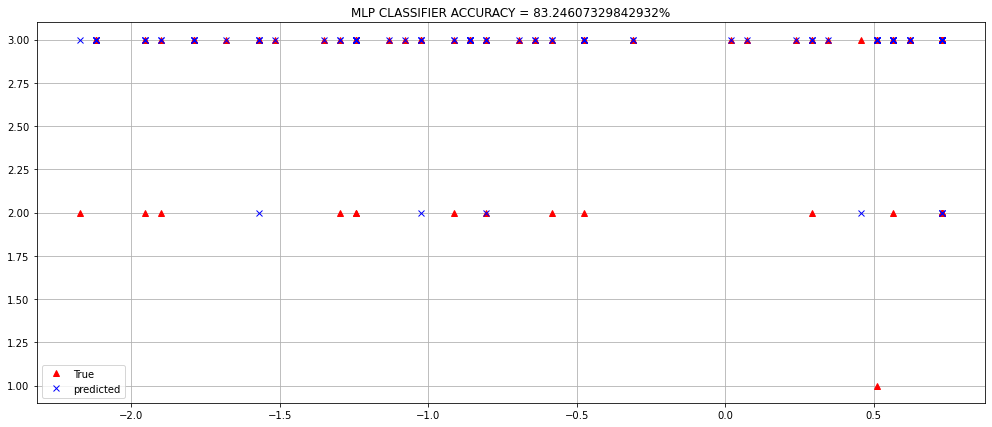

In [27]:
plt.figure(figsize=(17,7))
plt.grid()
plt.plot(test_data[:,3], test_labels, 'r^', label = 'True')
plt.plot(test_data[:,3], pred, 'bx', label = 'predicted')
plt.legend()
plt.title(f'MLP CLASSIFIER ACCURACY = {clf.score(test_data, test_labels)*100}%')
plt.show()

## RBF NETWORK SVM 

In [28]:
sv = SVC(kernel = 'rbf')

In [29]:
sv.fit(train_data, train_labels)

SVC()

In [30]:
pred = sv.predict(test_data)

In [31]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        30
           3       0.84      1.00      0.91       160

    accuracy                           0.84       191
   macro avg       0.28      0.33      0.30       191
weighted avg       0.70      0.84      0.76       191



/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

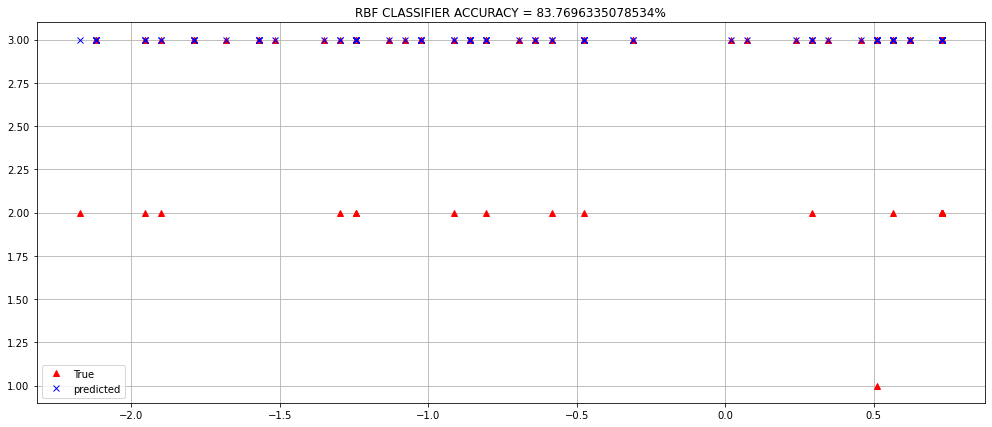

In [32]:
plt.figure(figsize=(17,7))
plt.grid()
plt.plot(test_data[:,3], test_labels, 'r^', label = 'True')
plt.plot(test_data[:,3], pred, 'bx', label = 'predicted')
plt.legend()
plt.title(f'RBF CLASSIFIER ACCURACY = {sv.score(test_data, test_labels)*100}%')
plt.show()

## GENERALISED LINEAR VECTORISATION CLASSIFER 

In [33]:
lv = GLVQ(distance_type="squared-euclidean",
    activation_type="swish",
    activation_params={"beta": 2},
    solver_type="steepest-gradient-descent",
    solver_params={"max_runs": 20, "step_size": 0.1})

In [34]:
lv.fit(train_data, train_labels)

GLVQ(activation_params={'beta': 2}, activation_type='swish',
     solver_params={'max_runs': 20, 'step_size': 0.1})

In [35]:
pred = lv.predict(test_data)

In [36]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      0.03      0.06        30
           3       0.84      0.99      0.91       160

    accuracy                           0.84       191
   macro avg       0.45      0.34      0.32       191
weighted avg       0.78      0.84      0.77       191



/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikramvelankar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

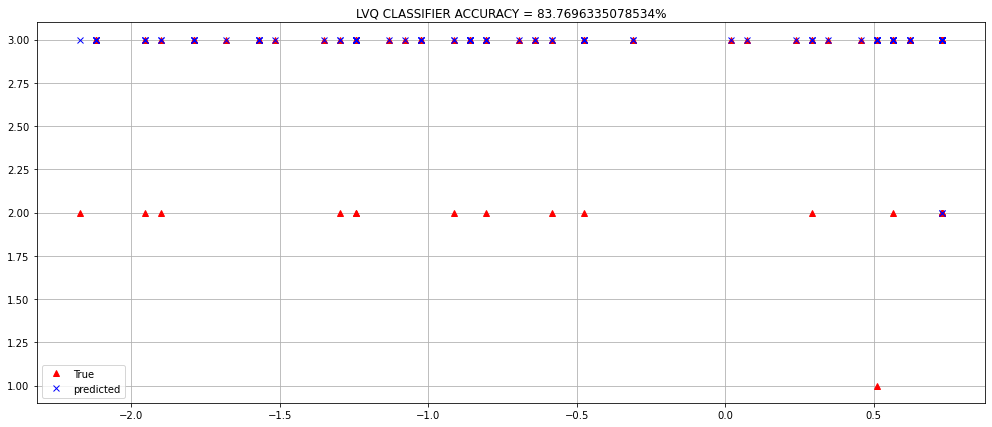

In [37]:
plt.figure(figsize=(17,7))
plt.grid()
plt.plot(test_data[:,3], test_labels, 'r^', label = 'True')
plt.plot(test_data[:,3], pred, 'bx', label = 'predicted')
plt.legend()
plt.title(f'LVQ CLASSIFIER ACCURACY = {lv.score(test_data, test_labels)*100}%')
plt.show()